In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_cust_acq=pd.read_excel('F:/analytix_labs/4. Pandas Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx',sheet_name='Customer Acqusition')
df_repay=pd.read_excel('F:/analytix_labs/4. Pandas Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx',sheet_name='Repayment')
df_spend=pd.read_excel('F:/analytix_labs/4. Pandas Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx',sheet_name='Spend')

In [3]:
df_cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC


In [4]:
df_repay.head(2)

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,338932.141919
1,2,A1,2004-01-03,131778.688758


In [5]:
df_spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,467747.601626


### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.

### 1. In the above dataset,

### a. In case age is less than 18, replace it with mean of age values.


In [13]:
df_cust_acq['Age']=np.where(df_cust_acq['Age'] < 18 , df_cust_acq.Age.mean(),df_cust_acq.Age)

In [14]:
df_cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
### (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [7]:
df_cust_spnd=pd.merge(df_spend,df_cust_acq,left_on ='Customer' , right_on ='Customer' , how ='inner',suffixes=('_CUST', '_TRXS') )

In [9]:
df_cust_spnd['Amount']=np.where(df_cust_spnd.Amount > df_cust_spnd.Limit,0.5*df_cust_spnd.Limit,df_cust_spnd.Amount)

In [11]:
df_cust_spnd_rpy=pd.merge(df_cust_spnd,df_repay,left_on ='Customer' , right_on ='Customer' , how ='inner',suffixes=('_SPND', '_RPY'))

In [15]:
df_cust_spnd_rpy

,Sl No:,Customer,Month_SPND,Type,Amount_SPND,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_RPY,Amount_RPY
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,338932.141919
1,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,131778.688758
2,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,485981.516736
3,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,452865.826385
4,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,277,2005-11-22,272532.145520
37280,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,295,2005-12-03,55517.326559
37281,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,313,2005-02-23,449140.674038
37282,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,331,2006-03-31,189481.026481


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
df_cust_rpy=pd.merge(df_repay,df_cust_acq,left_on ='Customer' , right_on ='Customer' , how ='inner')

In [17]:
df_cust_rpy

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,338932.141919,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A1,2004-01-03,131778.688758,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
2,3,A1,2004-01-15,485981.516736,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
3,4,A1,2004-01-25,452865.826385,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
4,5,A1,2005-01-17,154684.838196,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,277,A7,2005-11-22,272532.145520,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC
1496,295,A7,2005-12-03,55517.326559,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC
1497,313,A7,2005-02-23,449140.674038,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC
1498,331,A7,2006-03-31,189481.026481,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC


In [18]:
df_cust_spnd_rpy['Amount_RPY']=np.where(df_cust_spnd_rpy.Amount_RPY > df_cust_spnd_rpy.Limit,df_cust_spnd_rpy.Limit,df_cust_spnd_rpy.Amount_RPY)

In [19]:
df_cust_spnd_rpy

,Sl No:,Customer,Month_SPND,Type,Amount_SPND,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_RPY,Amount_RPY
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,338932.141919
1,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,131778.688758
2,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,485981.516736
3,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,452865.826385
4,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,277,2005-11-22,100001.000000
37280,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,295,2005-12-03,55517.326559
37281,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,313,2005-02-23,100001.000000
37282,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,331,2006-03-31,100001.000000


### 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [20]:
df_cust_acq.Customer.unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29',
       'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38',
       'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47',
       'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56',
       'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65',
       'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74',
       'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83',
       'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92',
       'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100'],
      dtype=object)

### b. How many distinct categories exist?

In [21]:
df_cust_acq.Segment.unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

### c. What is the average monthly spend by customers?

In [22]:
df_cust_spnd_rpy

,Sl No:,Customer,Month_SPND,Type,Amount_SPND,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_RPY,Amount_RPY
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,338932.141919
1,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,131778.688758
2,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,485981.516736
3,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,452865.826385
4,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,277,2005-11-22,100001.000000
37280,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,295,2005-12-03,55517.326559
37281,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,313,2005-02-23,100001.000000
37282,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,331,2006-03-31,100001.000000


In [23]:
df_cust_spnd_rpy['Yr_SPND']=pd.DatetimeIndex(df_cust_spnd_rpy['Month_SPND']).year

In [24]:
df_cust_spnd_rpy['Mn_SPND']=pd.DatetimeIndex(df_cust_spnd_rpy['Month_SPND']).month

In [25]:
df_spnd_mon=df_cust_spnd_rpy.pivot_table(index = ['Mn_SPND','Yr_SPND'], columns = 'Customer' , values = 'Amount_SPND', aggfunc = 'mean').round(2).fillna(0).reset_index()

In [26]:
df_spnd_mon

Customer,Mn_SPND,Yr_SPND,A1,A10,A100,A11,A12,A13,A14,A15,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,1,2004,286684.88,126775.00,46251.3,373639.64,295988.44,284162.26,295904.67,190791.09,...,0.00,0.0,0.00,164093.69,38195.25,281975.21,94369.18,5000.0,5000.5,5001.0
1,1,2005,3406.64,0.00,0.0,0.00,225932.07,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2,1,2006,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
3,2,2004,480587.01,0.00,0.0,316342.33,137863.69,0.00,0.00,72190.27,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
4,2,2005,389250.51,135227.75,0.0,284383.46,114401.78,298929.76,256838.83,81315.68,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
5,2,2006,0.00,0.00,0.0,0.00,0.00,149763.34,0.00,265587.35,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
6,3,2004,0.00,237246.56,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
7,3,2006,0.00,237565.14,0.0,250388.93,329755.54,360931.11,242337.33,149166.77,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
8,4,2004,0.00,0.00,0.0,462084.97,0.00,487294.61,10231.88,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
9,4,2005,0.00,0.00,0.0,0.00,180007.57,0.00,7531.58,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


### d. What is the average monthly repayment by customers?

In [27]:
df_cust_spnd_rpy['Yr_RPY']=pd.DatetimeIndex(df_cust_spnd_rpy['Month_RPY']).year

In [28]:
df_cust_spnd_rpy['Mn_RPY']=pd.DatetimeIndex(df_cust_spnd_rpy['Month_RPY']).month

In [29]:
df_rpy_mon=df_cust_spnd_rpy.pivot_table(index = ['Mn_RPY','Yr_RPY'], columns = 'Customer' , values = 'Amount_RPY', aggfunc = 'mean').round(2).fillna(0).reset_index()

In [30]:
df_rpy_mon

Customer,Mn_RPY,Yr_RPY,A1,A10,A100,A11,A12,A13,A14,A15,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,1,2004,298272.44,285061.68,100000.0,198036.76,253710.62,360279.60,306521.74,212714.82,...,0.00,0.00,0.00,491626.29,388682.58,381370.44,100000.0,10000.0,10001.0,10002.0
1,1,2005,154684.84,447840.44,0.0,0.00,339415.81,317368.95,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2,1,2006,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,2,2004,276490.14,0.00,0.0,0.00,312770.83,436652.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
4,2,2005,158031.22,169852.73,0.0,196295.74,192705.51,320601.30,219910.51,279665.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
5,2,2006,0.00,0.00,0.0,0.00,0.00,122885.26,455656.97,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
6,3,2004,0.00,379401.69,0.0,0.00,0.00,0.00,49484.24,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
7,3,2006,0.00,407721.23,0.0,425709.04,244553.41,128821.42,266738.45,218067.58,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
8,4,2004,0.00,0.00,0.0,0.00,491017.66,0.00,287642.18,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
9,4,2005,0.00,70168.56,0.0,0.00,134724.86,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [31]:
df_mon_SPND=df_spnd_mon.loc[:,df_spnd_mon.columns.difference(['Customer','Mn_SPND','Yr_SPND'])].sum(axis=0).reset_index()

In [32]:
df_mon_SPND

,Customer,0
0,A1,2369246.11
1,A10,2221007.78
2,A100,46251.30
3,A11,4022294.71
4,A12,2755377.65
...,...,...
95,A95,281975.21
96,A96,94369.18
97,A97,5000.00
98,A98,5000.50


In [33]:
df_mon_SPND.rename(columns={0:'Month_Total_Spend'},inplace=True)

In [34]:
df_mon_RPY=df_rpy_mon.loc[:,df_rpy_mon.columns.difference(['Customer','Mn_RPY','Yr_RPY'])].sum(axis=0).reset_index()

In [35]:
df_mon_RPY.rename(columns={0:'Month_Total_Repaid'},inplace=True)

In [36]:
df_mon_RPY

,Customer,Month_Total_Repaid
0,A1,2563649.64
1,A10,3026858.99
2,A100,100000.00
3,A11,2140572.83
4,A12,4071543.99
...,...,...
95,A95,381370.44
96,A96,100000.00
97,A97,10000.00
98,A98,10001.00


In [37]:
df_prof_mon=pd.merge(df_mon_SPND,df_mon_RPY,left_on =['Customer'] , right_on =['Customer']  , how ='inner',suffixes=('_SPND', '_RPY'))

In [38]:
df_prof_mon['Profit']=np.where(df_prof_mon.Month_Total_Repaid > df_prof_mon.Month_Total_Spend,0.029*(df_prof_mon.Month_Total_Repaid-df_prof_mon.Month_Total_Spend),0)

In [39]:
df_prof_mon.Profit.sum()

771824.1673399999

### f. What are the top 5 product types?

In [40]:
df_cust_spnd_rpy.Type.unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET', 'MOVIE TICKET',
       'RENTAL', 'BIKE', 'SHOPPING', 'AUTO'], dtype=object)

In [41]:
df_top_five_prd=df_cust_spnd_rpy.groupby(['Type']).Amount_SPND.sum().reset_index()

In [42]:
df_top_five_prd.sort_values('Amount_SPND',ascending = False).reset_index(drop = True).head(5)

,Type,Amount_SPND
0,PETRO,7.972584e+08
1,CAMERA,7.895910e+08
2,FOOD,6.510741e+08
3,AIR TICKET,6.366871e+08
4,TRAIN TICKET,5.161970e+08


### g. Which city is having maximum spend?

In [43]:
df_cust_spnd_rpy.City.unique()

array(['BANGALORE', 'PATNA', 'CHENNAI', 'CALCUTTA', 'COCHIN', 'BOMBAY',
       'DELHI', 'TRIVANDRUM'], dtype=object)

In [44]:
df_top_city=df_cust_spnd_rpy.groupby(['City']).Amount_SPND.sum().reset_index()

In [45]:
df_top_city.sort_values('Amount_SPND',ascending = False).head(1)

,City,Amount_SPND
4,COCHIN,1.253554e+09


### h. Which age group is spending more money?

In [46]:
df_cust_spnd_rpy

,Sl No:,Customer,Month_SPND,Type,Amount_SPND,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_RPY,Amount_RPY,Yr_SPND,Mn_SPND,Yr_RPY,Mn_RPY
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,338932.141919,2004,1,2004,1
1,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,131778.688758,2004,1,2004,1
2,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,485981.516736,2004,1,2004,1
3,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,452865.826385,2004,1,2004,1
4,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,154684.838196,2004,1,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,277,2005-11-22,100001.000000,2006,4,2005,11
37280,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,295,2005-12-03,55517.326559,2006,4,2005,12
37281,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,313,2005-02-23,100001.000000,2006,4,2005,2
37282,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,C7,Salaried_MNC,331,2006-03-31,100001.000000,2006,4,2006,3


In [47]:
df_cust_spnd_rpy['Age_Grp']=pd.qcut(df_cust_spnd_rpy.Age,5)

In [48]:
df_age_grp=df_cust_spnd_rpy.groupby('Age_Grp').Amount_SPND.sum().reset_index()

In [49]:
df_age_grp.sort_values('Amount_SPND',ascending =False).head(1)

,Age_Grp,Amount_SPND
1,"(34.068, 37.462]",2.342698e+09


### i. Who are the top 10 customers in terms of repayment?

In [50]:
df_top_ten=df_cust_spnd_rpy.groupby('Customer').Amount_RPY.sum().reset_index()

In [51]:
df_top_ten.sort_values('Amount_RPY',ascending = False).head(10)

,Customer,Amount_RPY
58,A61,3.675662e+08
57,A60,3.483897e+08
37,A42,2.767827e+08
5,A13,2.633883e+08
32,A38,2.543654e+08
38,A43,2.472570e+08
35,A40,2.378257e+08
6,A14,2.373129e+08
39,A44,2.367619e+08
4,A12,2.283113e+08


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [52]:
df_city_spnd=df_cust_spnd_rpy

In [53]:
df_city_spnd['Year']=pd.DatetimeIndex(df_city_spnd.Month_SPND).year

In [54]:
df_city_spnd.Year.unique()

array([2004, 2005, 2006], dtype=int64)

In [55]:
df_city_spnd1=df_city_spnd.groupby(['Year','City','Product']).Amount_SPND.sum().reset_index()

In [56]:
df_city_spnd1.head(12)

,Year,City,Product,Amount_SPND
0,2004,BANGALORE,Gold,2.670055e+08
1,2004,BANGALORE,Platimum,2.728607e+07
2,2004,BANGALORE,Silver,2.686345e+07
3,2004,BOMBAY,Gold,1.635552e+08
4,2004,BOMBAY,Platimum,2.360298e+07
5,2004,BOMBAY,Silver,1.711632e+07
6,2004,CALCUTTA,Gold,2.323533e+08
7,2004,CALCUTTA,Platimum,6.529119e+07
8,2004,CALCUTTA,Silver,9.322500e+06
9,2004,CHENNAI,Gold,3.732256e+07


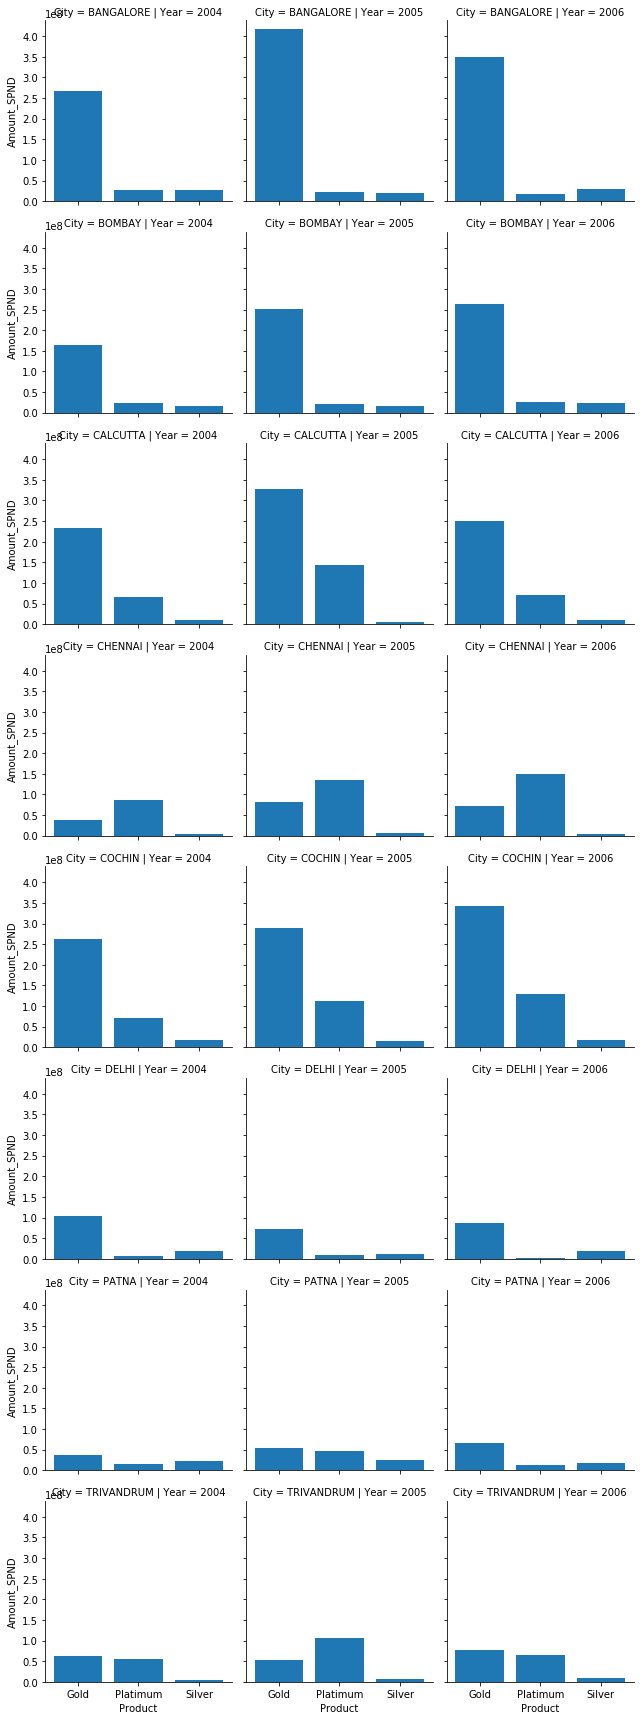

In [57]:
g = sns.FacetGrid(df_city_spnd1, col='Year',row='City')
g=g.map(plt.bar,'Product','Amount_SPND')

### 4. Create graphs for


### a. Monthly comparison of total spends, city wise


In [58]:
df_city_spnd['Month']=pd.DatetimeIndex(df_city_spnd.Month_SPND).month

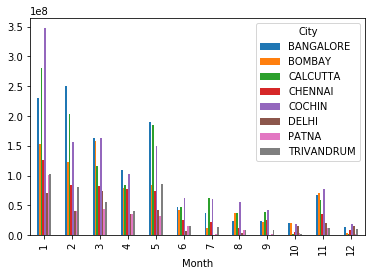

In [59]:
df_city_spnd.pivot_table(index = ['Month'], columns = 'City' , values = 'Amount_SPND', aggfunc = 'sum').plot(kind='bar')

### b. Comparison of yearly spend on air tickets

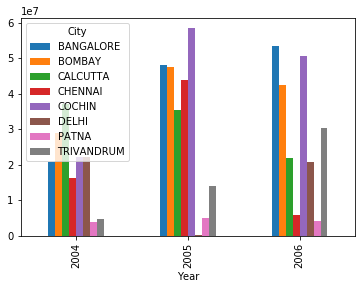

In [60]:
df_city_spnd[df_city_spnd.Type=='AIR TICKET'].pivot_table(index = ['Year'], columns = 'City' , values = 'Amount_SPND', aggfunc = 'sum').plot(kind='bar')

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [61]:
df_city_spnd

,Sl No:,Customer,Month_SPND,Type,Amount_SPND,No,Age,City,Product,Limit,...,SL No:,Month_RPY,Amount_RPY,Yr_SPND,Mn_SPND,Yr_RPY,Mn_RPY,Age_Grp,Year,Month
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,1,2004-01-12,338932.141919,2004,1,2004,1,"(18.005, 34.068]",2004,1
1,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,2,2004-01-03,131778.688758,2004,1,2004,1,"(18.005, 34.068]",2004,1
2,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,3,2004-01-15,485981.516736,2004,1,2004,1,"(18.005, 34.068]",2004,1
3,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,4,2004-01-25,452865.826385,2004,1,2004,1,"(18.005, 34.068]",2004,1
4,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,5,2005-01-17,154684.838196,2004,1,2005,1,"(18.005, 34.068]",2004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,...,277,2005-11-22,100001.000000,2006,4,2005,11,"(42.477, 52.643]",2006,4
37280,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,...,295,2005-12-03,55517.326559,2006,4,2005,12,"(42.477, 52.643]",2006,4
37281,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,...,313,2005-02-23,100001.000000,2006,4,2005,2,"(42.477, 52.643]",2006,4
37282,349,A7,2006-04-19,JEWELLERY,50000.500000,7,49.818698,COCHIN,Silver,100001,...,331,2006-03-31,100001.000000,2006,4,2006,3,"(42.477, 52.643]",2006,4


In [62]:
df_prod_trnd=df_city_spnd.pivot_table(index=['Yr_SPND','Mn_SPND','Product'],values='Amount_SPND',aggfunc = 'sum').reset_index()

In [63]:
df_prod_trnd

,Yr_SPND,Mn_SPND,Product,Amount_SPND
0,2004,1,Gold,8.540287e+08
1,2004,1,Platimum,2.915249e+08
2,2004,1,Silver,8.361288e+07
3,2004,2,Gold,8.450023e+07
4,2004,2,Platimum,8.865222e+06
...,...,...,...,...
84,2006,11,Platimum,2.397156e+07
85,2006,11,Silver,3.850023e+06
86,2006,12,Gold,2.007784e+07
87,2006,12,Platimum,1.261193e+07


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


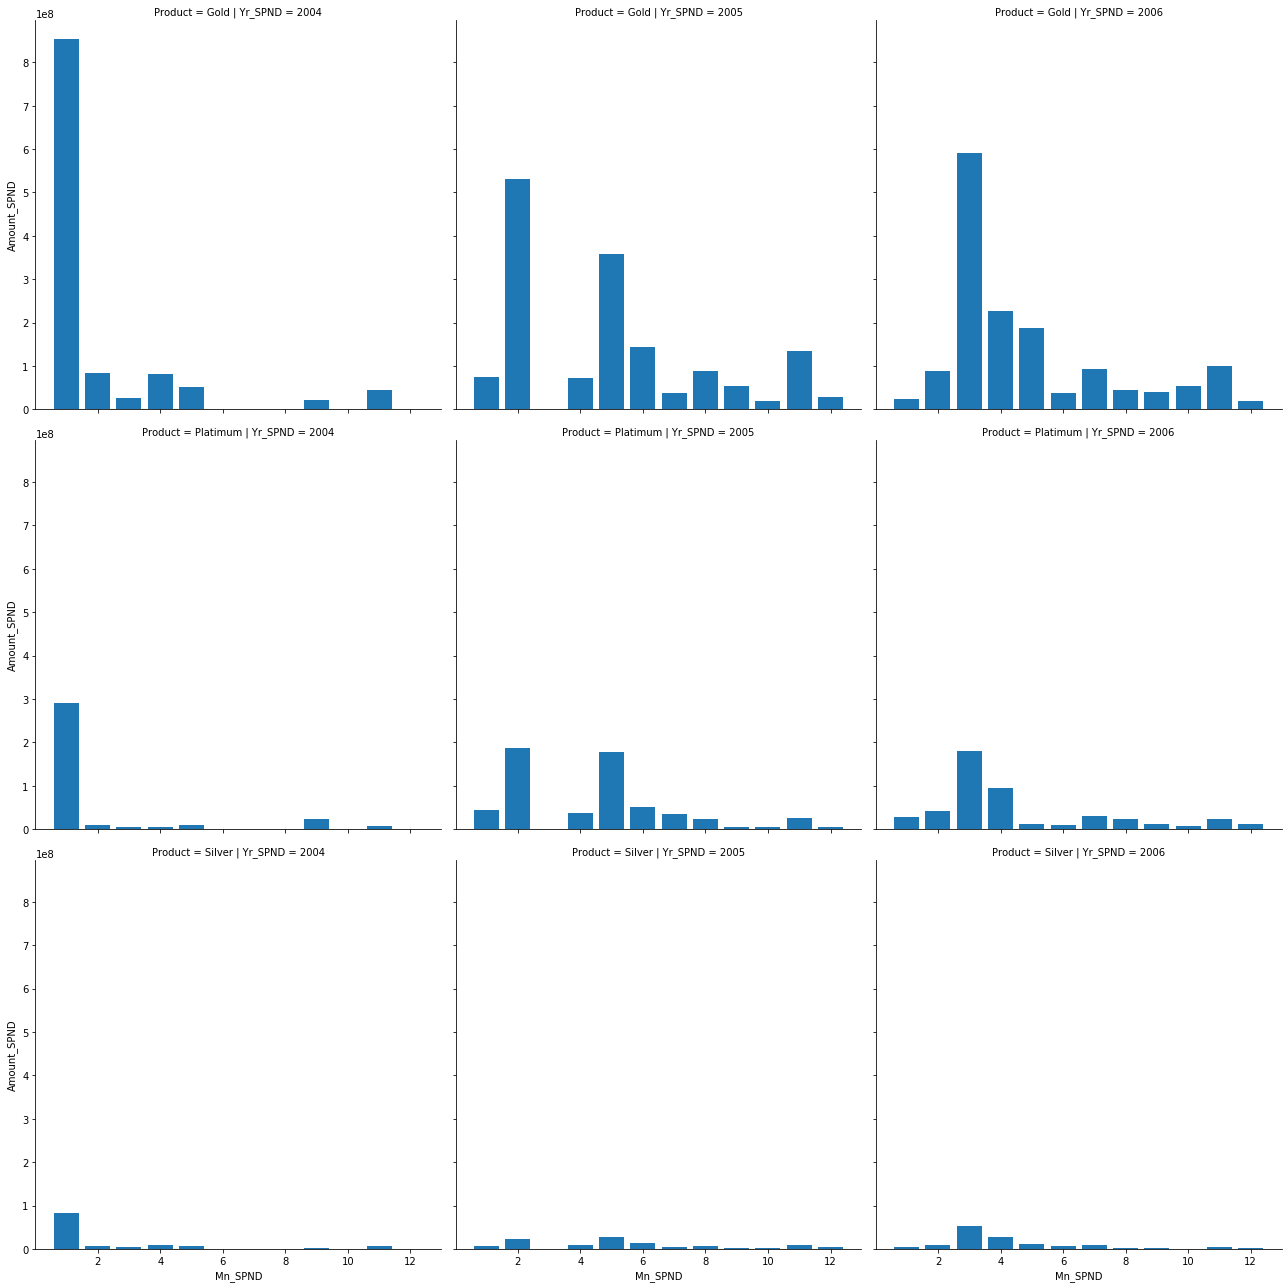

In [64]:
g=sns.FacetGrid(df_prod_trnd, col='Yr_SPND',row='Product',size=6)
g=g.map(plt.bar,'Mn_SPND','Amount_SPND')

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by
#### different products and by different time periods i.e. year or month. The user should be able
### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
### function should automatically take these inputs while identifying the top 10 customers.

In [65]:
df_cust_spnd_rpy.head(10)

,Sl No:,Customer,Month_SPND,Type,Amount_SPND,No,Age,City,Product,Limit,...,SL No:,Month_RPY,Amount_RPY,Yr_SPND,Mn_SPND,Yr_RPY,Mn_RPY,Age_Grp,Year,Month
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,1,2004-01-12,338932.141919,2004,1,2004,1,"(18.005, 34.068]",2004,1
1,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,2,2004-01-03,131778.688758,2004,1,2004,1,"(18.005, 34.068]",2004,1
2,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,3,2004-01-15,485981.516736,2004,1,2004,1,"(18.005, 34.068]",2004,1
3,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,4,2004-01-25,452865.826385,2004,1,2004,1,"(18.005, 34.068]",2004,1
4,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,5,2005-01-17,154684.838196,2004,1,2005,1,"(18.005, 34.068]",2004,1
5,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,6,2005-02-23,65040.537369,2004,1,2005,2,"(18.005, 34.068]",2004,1
6,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,7,2005-02-01,87857.926289,2004,1,2005,2,"(18.005, 34.068]",2004,1
7,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,103,2004-01-12,210398.148575,2004,1,2004,1,"(18.005, 34.068]",2004,1
8,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,117,2004-02-05,276490.143237,2004,1,2004,2,"(18.005, 34.068]",2004,1
9,1,A1,2004-01-12,JEWELLERY,344054.980813,1,34.012349,BANGALORE,Gold,500000,...,131,2006-04-19,306962.588150,2004,1,2006,4,"(18.005, 34.068]",2004,1


In [80]:
def fn_time_repay(x,y):
    if y.lower()=='yearly':
        return (df_cust_spnd_rpy.loc[df_cust_spnd_rpy.Product==x].pivot_table(index=['City','Yr_RPY','Product'],
                values='Amount_RPY',aggfunc = 'sum').reset_index().sort_values('Amount_RPY',ascending=False).head(10).reset_index(drop=True))
    elif y.lower()=='monthly':
        return (df_cust_spnd_rpy.loc[df_cust_spnd_rpy.Product==x].pivot_table(index=['City','Mn_RPY','Product'],
                values='Amount_RPY',aggfunc = 'sum').reset_index().sort_values('Amount_RPY',ascending=False).head(10).reset_index(drop=True))
    else:
        print('Time period should be either Monthly / Yearly')

In [82]:
fn_time_repay('Platimum','YEARLY')#x=['Gold','Silver','Platimum'],y=['Monthly','Yearly']

,City,Yr_RPY,Product,Amount_RPY
0,COCHIN,2006,Platimum,1.482880e+08
1,CHENNAI,2006,Platimum,1.437361e+08
2,COCHIN,2005,Platimum,1.409546e+08
3,TRIVANDRUM,2005,Platimum,1.256940e+08
4,CHENNAI,2005,Platimum,1.214150e+08
5,CALCUTTA,2004,Platimum,1.192793e+08
6,CHENNAI,2004,Platimum,8.719790e+07
7,CALCUTTA,2005,Platimum,8.220168e+07
8,COCHIN,2004,Platimum,7.662433e+07
9,CALCUTTA,2006,Platimum,6.868321e+07


In [87]:
fn_time_repay('Silver','Monthly') #x=['Gold','Silver','Platimum'],y=['Monthly','Yearly']

,City,Mn_RPY,Product,Amount_RPY
0,PATNA,1,Silver,3.080682e+07
1,BOMBAY,1,Silver,2.970000e+07
2,COCHIN,1,Silver,2.479079e+07
3,BANGALORE,5,Silver,2.439973e+07
4,BANGALORE,1,Silver,2.430344e+07
5,PATNA,2,Silver,2.225245e+07
6,DELHI,1,Silver,2.166413e+07
7,PATNA,5,Silver,2.125297e+07
8,COCHIN,5,Silver,2.031439e+07
9,DELHI,5,Silver,2.008527e+07


In [89]:
fn_time_repay('Gold','YEARLY')#x=['Gold','Silver','Platimum'],y=['Monthly','Yearly']

,City,Yr_RPY,Product,Amount_RPY
0,BANGALORE,2006,Gold,4.024548e+08
1,BANGALORE,2005,Gold,3.472648e+08
2,CALCUTTA,2005,Gold,3.148235e+08
3,CALCUTTA,2006,Gold,3.035898e+08
4,COCHIN,2006,Gold,2.984307e+08
5,COCHIN,2005,Gold,2.950392e+08
6,BANGALORE,2004,Gold,2.884996e+08
7,BOMBAY,2004,Gold,2.438047e+08
8,BOMBAY,2006,Gold,2.354707e+08
9,BOMBAY,2005,Gold,2.344626e+08
